In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df = pd.read_csv('/content/drive/MyDrive/Data/tumors.csv')

In [49]:
X = df[['size of tumor']].values
y = df['Cancer'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [54]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

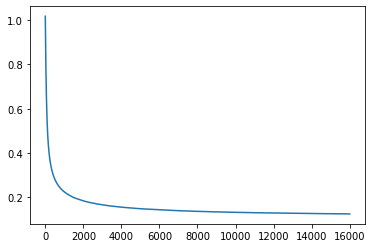

In [58]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD',loss='binary_crossentropy')
model.fit(X_train_scaled,y_train,epochs=16000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)


In [59]:
J_train = model.evaluate(X_train_scaled,y_train)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train,J_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.2812
0.1253090649843216 0.281242311000824


In [65]:
predictions = model.predict_classes(X_test_scaled)
Y_hat_test = model.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [63]:
predictions = model.predict_classes(X_train_scaled)
Y_hat_train = model.predict(X_train_scaled)
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      0.91      0.94        34

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [66]:
Y_hat_test

array([[5.8391690e-04],
       [9.7831178e-01],
       [9.2150688e-01],
       [3.3561748e-01],
       [8.8434064e-01],
       [3.9178163e-02],
       [2.4627954e-01],
       [9.6069038e-02],
       [9.9607921e-01],
       [4.6141928e-01],
       [9.9999797e-01],
       [2.9186440e-08],
       [9.9952966e-01],
       [3.8637519e-03],
       [8.8439752e-05],
       [7.6231360e-04],
       [9.7614175e-01],
       [1.4922699e-01],
       [9.9996185e-01],
       [9.4687080e-01]], dtype=float32)

In [67]:
predictions

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int32)